## Description

> The notebook wrangles the twitter archive of WeRateDogs.

> WeRateDogs is a popular twitter channel that rates people's dogs on a scale of 10. They are known for their unique rating system wherein some dogs get rated on a scale higher than 10.


> The wrangling process is divided into the following parts:
>                                                                        
    1. Gathering 
    2. Assesing  
    3. Cleaning  
    4. Storing  
    5. Analysis  
    6. Visualization  
    

## Setup

In [149]:
# Importing general libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering`

### Description

>The complete data for this project would be gathered from three different sources in three different file formats:  
 
> *Twitter archive enhanced*: a **csv** file on hand.  

> *Tweet image predictions*: a **tsv** file downloaded from a remote server.  

> *Tweet attributes*: a **txt** file extracted from a remote API. 

### Twitter Archive Enhanced

The file contains the tweet information of WeRateDogs up until 2017.The text field of the file has been used to extract some additional information such as the name of the dog considered and the the stage of the dog hence the name twitter-archive-enhanced.

Since the file is given to us, we just have to load it onto our workspace.

#### Load

In [68]:
# Loading twitter-archive-enhanced onto the workspace

twitter_archive_enhanced = pd.read_csv('extracted_files/twitter-archive-enhanced.csv')

#### Preview

In [69]:
# Preview

twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tweet Image Predictions

The images from the tweets of WeRateDogs was run through a neural network that classified breed of dogs. The image_predictions.tsv file contains the predictions from the neural network.

The file is stored on Udacity's servers. We would be using the requests library to extract the file from the servers.

#### Extract & Store

In [72]:
# Extracting image_predictions.tsv and storing it in extracted_files.csv

import requests

url =  "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

folder_name = 'extracted_files'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]),'wb') as file:
    file.write(response.content)

#### Load

In [74]:
# Loading image_predictions.tsv to workspace

tweet_image_predictions = pd.read_csv('extracted_files/image-predictions.tsv')

#### Preview

In [76]:
tweet_image_predictions.head()

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


### Tweet Attributes

→ Since the twitter-archive-enhanced dataset is missing the retweet_count & favorite_count of tweets, we will be extracting the same by quering twitter's API with the tweet_id's of the tweets.

→ We will use python's tweepy library to interact with twitter's API and extract the required information. Since some tweets would be deleted from the the time the twitter_archive_enhanced dataset was prepared, some of of queries would fail.

→ We will store the info extracted from the successful queries and store it in a json file called tweet_attrs.

→ As we woud be catching the failed queries, the tweet_id's associated with them would be stored in a separate csv file  called deleted_tweets

#### Extract

In [79]:
# Creating API Object

import tweepy


""" 
                          Store API Credential from twitter developer account.
                          Fill them in the empty strings below
                
      
"""

consumer_key    =    ''
consumer_secret =    ''
access_token    =    ''
access_secret   =    ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [81]:
# Quering twiter API 


"""                          CAUTION: This cell has a run time of 30 - 35 mins 
"""


"""  
               The script below queries the twitter API using the tweet_id from twitter_archive_enhanced 
               and writes the content of the API's json response to file: tweet_json.txt. 

               Simulataneously, it creates a list of all failed extractions containing the tweet_id and
               the error message.
               
"""



import json 

failed_extractions = []
itr = 1

with open('extracted_files/tweet_json.txt', 'w') as target_file:
    
    for id in twitter_archive_enhanced.tweet_id:
        
        print(f'Iteration: {itr}')
        print(f'Tweet ID: {id}')
        itr += 1
        
        try:

            tweet_attrs =  api.get_status(id, tweet_mode = 'extended')
            json.dump(tweet_attrs._json, target_file)
            target_file.write('\n')

            print('ID Extracted')
            
        except tweepy.TweepError as te:
            
            failed_extractions.append( { 'Id' : id,
                                         'Error' : te
                                       })
            
            print('ID Not Extracted')    

Iteration: 1
Tweet ID: 892420643555336193
ID Extracted
Iteration: 2
Tweet ID: 892177421306343426
ID Extracted
Iteration: 3
Tweet ID: 891815181378084864
ID Extracted
Iteration: 4
Tweet ID: 891689557279858688
ID Extracted
Iteration: 5
Tweet ID: 891327558926688256
ID Extracted
Iteration: 6
Tweet ID: 891087950875897856
ID Extracted
Iteration: 7
Tweet ID: 890971913173991426
ID Extracted
Iteration: 8
Tweet ID: 890729181411237888
ID Extracted
Iteration: 9
Tweet ID: 890609185150312448
ID Extracted
Iteration: 10
Tweet ID: 890240255349198849
ID Extracted
Iteration: 11
Tweet ID: 890006608113172480
ID Extracted
Iteration: 12
Tweet ID: 889880896479866881
ID Extracted
Iteration: 13
Tweet ID: 889665388333682689
ID Extracted
Iteration: 14
Tweet ID: 889638837579907072
ID Extracted
Iteration: 15
Tweet ID: 889531135344209921
ID Extracted
Iteration: 16
Tweet ID: 889278841981685760
ID Extracted
Iteration: 17
Tweet ID: 888917238123831296
ID Extracted
Iteration: 18
Tweet ID: 888804989199671297
ID Extracted
I

ID Extracted
Iteration: 147
Tweet ID: 863471782782697472
ID Extracted
Iteration: 148
Tweet ID: 863432100342583297
ID Extracted
Iteration: 149
Tweet ID: 863427515083354112
ID Extracted
Iteration: 150
Tweet ID: 863079547188785154
ID Extracted
Iteration: 151
Tweet ID: 863062471531167744
ID Extracted
Iteration: 152
Tweet ID: 862831371563274240
ID Extracted
Iteration: 153
Tweet ID: 862722525377298433
ID Extracted
Iteration: 154
Tweet ID: 862457590147678208
ID Extracted
Iteration: 155
Tweet ID: 862096992088072192
ID Extracted
Iteration: 156
Tweet ID: 861769973181624320
ID Not Extracted
Iteration: 157
Tweet ID: 861383897657036800
ID Extracted
Iteration: 158
Tweet ID: 861288531465048066
ID Extracted
Iteration: 159
Tweet ID: 861005113778896900
ID Extracted
Iteration: 160
Tweet ID: 860981674716409858
ID Extracted
Iteration: 161
Tweet ID: 860924035999428608
ID Extracted
Iteration: 162
Tweet ID: 860563773140209665
ID Extracted
Iteration: 163
Tweet ID: 860524505164394496
ID Extracted
Iteration: 164

ID Extracted
Iteration: 291
Tweet ID: 838150277551247360
ID Extracted
Iteration: 292
Tweet ID: 838085839343206401
ID Extracted
Iteration: 293
Tweet ID: 838083903487373313
ID Extracted
Iteration: 294
Tweet ID: 837820167694528512
ID Extracted
Iteration: 295
Tweet ID: 837482249356513284
ID Extracted
Iteration: 296
Tweet ID: 837471256429613056
ID Extracted
Iteration: 297
Tweet ID: 837366284874571778
ID Not Extracted
Iteration: 298
Tweet ID: 837110210464448512
ID Extracted
Iteration: 299
Tweet ID: 837012587749474308
ID Not Extracted
Iteration: 300
Tweet ID: 836989968035819520
ID Extracted
Iteration: 301
Tweet ID: 836753516572119041
ID Extracted
Iteration: 302
Tweet ID: 836677758902222849
ID Extracted
Iteration: 303
Tweet ID: 836648853927522308
ID Extracted
Iteration: 304
Tweet ID: 836397794269200385
ID Extracted
Iteration: 305
Tweet ID: 836380477523124226
ID Extracted
Iteration: 306
Tweet ID: 836260088725786625
ID Extracted
Iteration: 307
Tweet ID: 836001077879255040
ID Extracted
Iteration:

ID Not Extracted
Iteration: 434
Tweet ID: 820690176645140481
ID Not Extracted
Iteration: 435
Tweet ID: 820494788566847489
ID Not Extracted
Iteration: 436
Tweet ID: 820446719150292993
ID Not Extracted
Iteration: 437
Tweet ID: 820314633777061888
ID Not Extracted
Iteration: 438
Tweet ID: 820078625395449857
ID Not Extracted
Iteration: 439
Tweet ID: 820013781606658049
ID Not Extracted
Iteration: 440
Tweet ID: 819952236453363712
ID Not Extracted
Iteration: 441
Tweet ID: 819924195358416896
ID Not Extracted
Iteration: 442
Tweet ID: 819711362133872643
ID Not Extracted
Iteration: 443
Tweet ID: 819588359383371776
ID Not Extracted
Iteration: 444
Tweet ID: 819347104292290561
ID Not Extracted
Iteration: 445
Tweet ID: 819238181065359361
ID Not Extracted
Iteration: 446
Tweet ID: 819227688460238848
ID Not Extracted
Iteration: 447
Tweet ID: 819015337530290176
ID Not Extracted
Iteration: 448
Tweet ID: 819015331746349057
ID Not Extracted
Iteration: 449
Tweet ID: 819006400881917954
ID Not Extracted
Iterati

ID Extracted
Iteration: 573
Tweet ID: 801285448605831168
ID Extracted
Iteration: 574
Tweet ID: 801167903437357056
ID Extracted
Iteration: 575
Tweet ID: 801127390143516673
ID Extracted
Iteration: 576
Tweet ID: 801115127852503040
ID Extracted
Iteration: 577
Tweet ID: 800859414831898624
ID Extracted
Iteration: 578
Tweet ID: 800855607700029440
ID Extracted
Iteration: 579
Tweet ID: 800751577355128832
ID Extracted
Iteration: 580
Tweet ID: 800513324630806528
ID Extracted
Iteration: 581
Tweet ID: 800459316964663297
ID Extracted
Iteration: 582
Tweet ID: 800443802682937345
ID Extracted
Iteration: 583
Tweet ID: 800388270626521089
ID Extracted
Iteration: 584
Tweet ID: 800188575492947969
ID Extracted
Iteration: 585
Tweet ID: 800141422401830912
ID Extracted
Iteration: 586
Tweet ID: 800018252395122689
ID Extracted
Iteration: 587
Tweet ID: 799774291445383169
ID Extracted
Iteration: 588
Tweet ID: 799757965289017345
ID Extracted
Iteration: 589
Tweet ID: 799422933579902976
ID Extracted
Iteration: 590
Twe

ID Extracted
Iteration: 717
Tweet ID: 783821107061198850
ID Extracted
Iteration: 718
Tweet ID: 783695101801398276
ID Extracted
Iteration: 719
Tweet ID: 783466772167098368
ID Extracted
Iteration: 720
Tweet ID: 783391753726550016
ID Extracted
Iteration: 721
Tweet ID: 783347506784731136
ID Extracted
Iteration: 722
Tweet ID: 783334639985389568
ID Extracted
Iteration: 723
Tweet ID: 783085703974514689
ID Extracted
Iteration: 724
Tweet ID: 782969140009107456
ID Extracted
Iteration: 725
Tweet ID: 782747134529531904
ID Extracted
Iteration: 726
Tweet ID: 782722598790725632
ID Extracted
Iteration: 727
Tweet ID: 782598640137187329
ID Extracted
Iteration: 728
Tweet ID: 782305867769217024
ID Extracted
Iteration: 729
Tweet ID: 782021823840026624
ID Extracted
Iteration: 730
Tweet ID: 781955203444699136
ID Extracted
Iteration: 731
Tweet ID: 781661882474196992
ID Extracted
Iteration: 732
Tweet ID: 781655249211752448
ID Extracted
Iteration: 733
Tweet ID: 781524693396357120
ID Extracted
Iteration: 734
Twe

ID Extracted
Iteration: 861
Tweet ID: 763167063695355904
ID Extracted
Iteration: 862
Tweet ID: 763103485927849985
ID Extracted
Iteration: 863
Tweet ID: 762699858130116608
ID Extracted
Iteration: 864
Tweet ID: 762471784394268675
ID Extracted
Iteration: 865
Tweet ID: 762464539388485633
ID Extracted
Iteration: 866
Tweet ID: 762316489655476224
ID Extracted
Iteration: 867
Tweet ID: 762035686371364864
ID Extracted
Iteration: 868
Tweet ID: 761976711479193600
ID Extracted
Iteration: 869
Tweet ID: 761750502866649088
ID Extracted
Iteration: 870
Tweet ID: 761745352076779520
ID Extracted
Iteration: 871
Tweet ID: 761672994376806400
ID Extracted
Iteration: 872
Tweet ID: 761599872357261312
ID Extracted
Iteration: 873
Tweet ID: 761371037149827077
ID Extracted
Iteration: 874
Tweet ID: 761334018830917632
ID Extracted
Iteration: 875
Tweet ID: 761292947749015552
ID Extracted
Iteration: 876
Tweet ID: 761227390836215808
ID Extracted
Iteration: 877
Tweet ID: 761004547850530816
ID Extracted
Iteration: 878
Twe

ID Extracted
Iteration: 1005
Tweet ID: 747816857231626240
ID Extracted
Iteration: 1006
Tweet ID: 747651430853525504
ID Extracted
Iteration: 1007
Tweet ID: 747648653817413632
ID Extracted
Iteration: 1008
Tweet ID: 747600769478692864


Rate limit reached. Sleeping for: 235


ID Extracted
Iteration: 1009
Tweet ID: 747594051852075008
ID Extracted
Iteration: 1010
Tweet ID: 747512671126323200
ID Extracted
Iteration: 1011
Tweet ID: 747461612269887489
ID Extracted
Iteration: 1012
Tweet ID: 747439450712596480
ID Extracted
Iteration: 1013
Tweet ID: 747242308580548608
ID Extracted
Iteration: 1014
Tweet ID: 747219827526344708
ID Extracted
Iteration: 1015
Tweet ID: 747204161125646336
ID Extracted
Iteration: 1016
Tweet ID: 747103485104099331
ID Extracted
Iteration: 1017
Tweet ID: 746906459439529985
ID Extracted
Iteration: 1018
Tweet ID: 746872823977771008
ID Extracted
Iteration: 1019
Tweet ID: 746818907684614144
ID Extracted
Iteration: 1020
Tweet ID: 746790600704425984
ID Extracted
Iteration: 1021
Tweet ID: 746757706116112384
ID Extracted
Iteration: 1022
Tweet ID: 746726898085036033
ID Extracted
Iteration: 1023
Tweet ID: 746542875601690625
ID Extracted
Iteration: 1024
Tweet ID: 746521445350707200
ID Extracted
Iteration: 1025
Tweet ID: 746507379341139972
ID Extracted
I

ID Extracted
Iteration: 1151
Tweet ID: 726224900189511680
ID Extracted
Iteration: 1152
Tweet ID: 725842289046749185
ID Extracted
Iteration: 1153
Tweet ID: 725786712245440512
ID Extracted
Iteration: 1154
Tweet ID: 725729321944506368
ID Extracted
Iteration: 1155
Tweet ID: 725458796924002305
ID Extracted
Iteration: 1156
Tweet ID: 724983749226668032
ID Extracted
Iteration: 1157
Tweet ID: 724771698126512129
ID Extracted
Iteration: 1158
Tweet ID: 724405726123311104
ID Extracted
Iteration: 1159
Tweet ID: 724049859469295616
ID Extracted
Iteration: 1160
Tweet ID: 724046343203856385
ID Extracted
Iteration: 1161
Tweet ID: 724004602748780546
ID Extracted
Iteration: 1162
Tweet ID: 723912936180330496
ID Extracted
Iteration: 1163
Tweet ID: 723688335806480385
ID Extracted
Iteration: 1164
Tweet ID: 723673163800948736
ID Extracted
Iteration: 1165
Tweet ID: 723179728551723008
ID Extracted
Iteration: 1166
Tweet ID: 722974582966214656
ID Extracted
Iteration: 1167
Tweet ID: 722613351520608256
ID Extracted
I

ID Extracted
Iteration: 1293
Tweet ID: 708109389455101952
ID Extracted
Iteration: 1294
Tweet ID: 708026248782585858
ID Extracted
Iteration: 1295
Tweet ID: 707995814724026368
ID Extracted
Iteration: 1296
Tweet ID: 707983188426153984
ID Extracted
Iteration: 1297
Tweet ID: 707969809498152960
ID Extracted
Iteration: 1298
Tweet ID: 707776935007539200
ID Extracted
Iteration: 1299
Tweet ID: 707741517457260545
ID Extracted
Iteration: 1300
Tweet ID: 707738799544082433
ID Extracted
Iteration: 1301
Tweet ID: 707693576495472641
ID Extracted
Iteration: 1302
Tweet ID: 707629649552134146
ID Extracted
Iteration: 1303
Tweet ID: 707610948723478529
ID Extracted
Iteration: 1304
Tweet ID: 707420581654872064
ID Extracted
Iteration: 1305
Tweet ID: 707411934438625280
ID Extracted
Iteration: 1306
Tweet ID: 707387676719185920
ID Extracted
Iteration: 1307
Tweet ID: 707377100785885184
ID Extracted
Iteration: 1308
Tweet ID: 707315916783140866
ID Extracted
Iteration: 1309
Tweet ID: 707297311098011648
ID Extracted
I

ID Extracted
Iteration: 1435
Tweet ID: 697270446429966336
ID Extracted
Iteration: 1436
Tweet ID: 697259378236399616
ID Extracted
Iteration: 1437
Tweet ID: 697255105972801536
ID Extracted
Iteration: 1438
Tweet ID: 697242256848379904
ID Extracted
Iteration: 1439
Tweet ID: 696900204696625153
ID Extracted
Iteration: 1440
Tweet ID: 696894894812565505
ID Extracted
Iteration: 1441
Tweet ID: 696886256886657024
ID Extracted
Iteration: 1442
Tweet ID: 696877980375769088
ID Extracted
Iteration: 1443
Tweet ID: 696754882863349760
ID Extracted
Iteration: 1444
Tweet ID: 696744641916489729
ID Extracted
Iteration: 1445
Tweet ID: 696713835009417216
ID Extracted
Iteration: 1446
Tweet ID: 696518437233913856
ID Extracted
Iteration: 1447
Tweet ID: 696490539101908992
ID Extracted
Iteration: 1448
Tweet ID: 696488710901260288
ID Extracted
Iteration: 1449
Tweet ID: 696405997980676096
ID Extracted
Iteration: 1450
Tweet ID: 696100768806522880
ID Extracted
Iteration: 1451
Tweet ID: 695816827381944320
ID Extracted
I

ID Extracted
Iteration: 1577
Tweet ID: 687460506001633280
ID Extracted
Iteration: 1578
Tweet ID: 687399393394311168
ID Extracted
Iteration: 1579
Tweet ID: 687317306314240000
ID Extracted
Iteration: 1580
Tweet ID: 687312378585812992
ID Extracted
Iteration: 1581
Tweet ID: 687127927494963200
ID Extracted
Iteration: 1582
Tweet ID: 687124485711986689
ID Extracted
Iteration: 1583
Tweet ID: 687109925361856513
ID Extracted
Iteration: 1584
Tweet ID: 687102708889812993
ID Extracted
Iteration: 1585
Tweet ID: 687096057537363968
ID Extracted
Iteration: 1586
Tweet ID: 686947101016735744
ID Extracted
Iteration: 1587
Tweet ID: 686760001961103360
ID Extracted
Iteration: 1588
Tweet ID: 686749460672679938
ID Extracted
Iteration: 1589
Tweet ID: 686730991906516992
ID Extracted
Iteration: 1590
Tweet ID: 686683045143953408
ID Extracted
Iteration: 1591
Tweet ID: 686618349602762752
ID Extracted
Iteration: 1592
Tweet ID: 686606069955735556
ID Extracted
Iteration: 1593
Tweet ID: 686394059078897668
ID Extracted
I

ID Extracted
Iteration: 1719
Tweet ID: 680176173301628928
ID Extracted
Iteration: 1720
Tweet ID: 680161097740095489
ID Extracted
Iteration: 1721
Tweet ID: 680145970311643136
ID Extracted
Iteration: 1722
Tweet ID: 680130881361686529
ID Extracted
Iteration: 1723
Tweet ID: 680115823365742593
ID Extracted
Iteration: 1724
Tweet ID: 680100725817409536
ID Extracted
Iteration: 1725
Tweet ID: 680085611152338944
ID Extracted
Iteration: 1726
Tweet ID: 680070545539371008
ID Extracted
Iteration: 1727
Tweet ID: 680055455951884288
ID Not Extracted
Iteration: 1728
Tweet ID: 679877062409191424
ID Extracted
Iteration: 1729
Tweet ID: 679872969355714560
ID Extracted
Iteration: 1730
Tweet ID: 679862121895714818
ID Extracted
Iteration: 1731
Tweet ID: 679854723806179328
ID Extracted
Iteration: 1732
Tweet ID: 679844490799091713
ID Extracted
Iteration: 1733
Tweet ID: 679828447187857408
ID Extracted
Iteration: 1734
Tweet ID: 679777920601223168
ID Extracted
Iteration: 1735
Tweet ID: 679736210798047232
ID Extract

ID Extracted
Iteration: 1861
Tweet ID: 675489971617296384
ID Extracted
Iteration: 1862
Tweet ID: 675483430902214656
ID Extracted
Iteration: 1863
Tweet ID: 675432746517426176
ID Extracted
Iteration: 1864
Tweet ID: 675372240448454658
ID Extracted
Iteration: 1865
Tweet ID: 675362609739206656
ID Extracted
Iteration: 1866
Tweet ID: 675354435921575936
ID Extracted
Iteration: 1867
Tweet ID: 675349384339542016
ID Extracted
Iteration: 1868
Tweet ID: 675334060156301312
ID Extracted
Iteration: 1869
Tweet ID: 675166823650848770
ID Extracted
Iteration: 1870
Tweet ID: 675153376133427200
ID Extracted
Iteration: 1871
Tweet ID: 675149409102012420
ID Extracted
Iteration: 1872
Tweet ID: 675147105808306176
ID Extracted
Iteration: 1873
Tweet ID: 675146535592706048
ID Extracted
Iteration: 1874
Tweet ID: 675145476954566656
ID Extracted
Iteration: 1875
Tweet ID: 675135153782571009
ID Extracted
Iteration: 1876
Tweet ID: 675113801096802304
ID Extracted
Iteration: 1877
Tweet ID: 675111688094527488
ID Extracted
I

Rate limit reached. Sleeping for: 274


ID Extracted
Iteration: 1909
Tweet ID: 674436901579923456
ID Extracted
Iteration: 1910
Tweet ID: 674422304705744896
ID Extracted
Iteration: 1911
Tweet ID: 674416750885273600
ID Extracted
Iteration: 1912
Tweet ID: 674410619106390016
ID Extracted
Iteration: 1913
Tweet ID: 674394782723014656
ID Extracted
Iteration: 1914
Tweet ID: 674372068062928900
ID Extracted
Iteration: 1915
Tweet ID: 674330906434379776
ID Extracted
Iteration: 1916
Tweet ID: 674318007229923329
ID Extracted
Iteration: 1917
Tweet ID: 674307341513269249
ID Extracted
Iteration: 1918
Tweet ID: 674291837063053312
ID Extracted
Iteration: 1919
Tweet ID: 674271431610523648
ID Extracted
Iteration: 1920
Tweet ID: 674269164442398721
ID Extracted
Iteration: 1921
Tweet ID: 674265582246694913
ID Extracted
Iteration: 1922
Tweet ID: 674262580978937856
ID Extracted
Iteration: 1923
Tweet ID: 674255168825880576
ID Extracted
Iteration: 1924
Tweet ID: 674082852460433408
ID Extracted
Iteration: 1925
Tweet ID: 674075285688614912
ID Extracted
I

ID Extracted
Iteration: 2051
Tweet ID: 671497587707535361
ID Extracted
Iteration: 2052
Tweet ID: 671488513339211776
ID Extracted
Iteration: 2053
Tweet ID: 671486386088865792
ID Extracted
Iteration: 2054
Tweet ID: 671485057807351808
ID Extracted
Iteration: 2055
Tweet ID: 671390180817915904
ID Extracted
Iteration: 2056
Tweet ID: 671362598324076544
ID Extracted
Iteration: 2057
Tweet ID: 671357843010908160
ID Extracted
Iteration: 2058
Tweet ID: 671355857343524864
ID Extracted
Iteration: 2059
Tweet ID: 671347597085433856
ID Extracted
Iteration: 2060
Tweet ID: 671186162933985280
ID Extracted
Iteration: 2061
Tweet ID: 671182547775299584
ID Extracted
Iteration: 2062
Tweet ID: 671166507850801152
ID Extracted
Iteration: 2063
Tweet ID: 671163268581498880
ID Extracted
Iteration: 2064
Tweet ID: 671159727754231808
ID Extracted
Iteration: 2065
Tweet ID: 671154572044468225
ID Extracted
Iteration: 2066
Tweet ID: 671151324042559489
ID Extracted
Iteration: 2067
Tweet ID: 671147085991960577
ID Extracted
I

ID Extracted
Iteration: 2193
Tweet ID: 668932921458302977
ID Extracted
Iteration: 2194
Tweet ID: 668902994700836864
ID Extracted
Iteration: 2195
Tweet ID: 668892474547511297
ID Extracted
Iteration: 2196
Tweet ID: 668872652652679168
ID Extracted
Iteration: 2197
Tweet ID: 668852170888998912
ID Extracted
Iteration: 2198
Tweet ID: 668826086256599040
ID Extracted
Iteration: 2199
Tweet ID: 668815180734689280
ID Extracted
Iteration: 2200
Tweet ID: 668779399630725120
ID Extracted
Iteration: 2201
Tweet ID: 668655139528511488
ID Extracted
Iteration: 2202
Tweet ID: 668645506898350081
ID Extracted
Iteration: 2203
Tweet ID: 668643542311546881
ID Extracted
Iteration: 2204
Tweet ID: 668641109086707712
ID Extracted
Iteration: 2205
Tweet ID: 668636665813057536
ID Extracted
Iteration: 2206
Tweet ID: 668633411083464705
ID Extracted
Iteration: 2207
Tweet ID: 668631377374486528
ID Extracted
Iteration: 2208
Tweet ID: 668627278264475648
ID Extracted
Iteration: 2209
Tweet ID: 668625577880875008
ID Extracted
I

ID Extracted
Iteration: 2335
Tweet ID: 666293911632134144
ID Extracted
Iteration: 2336
Tweet ID: 666287406224695296
ID Extracted
Iteration: 2337
Tweet ID: 666273097616637952
ID Extracted
Iteration: 2338
Tweet ID: 666268910803644416
ID Extracted
Iteration: 2339
Tweet ID: 666104133288665088
ID Extracted
Iteration: 2340
Tweet ID: 666102155909144576
ID Extracted
Iteration: 2341
Tweet ID: 666099513787052032
ID Extracted
Iteration: 2342
Tweet ID: 666094000022159362
ID Extracted
Iteration: 2343
Tweet ID: 666082916733198337
ID Extracted
Iteration: 2344
Tweet ID: 666073100786774016
ID Extracted
Iteration: 2345
Tweet ID: 666071193221509120
ID Extracted
Iteration: 2346
Tweet ID: 666063827256086533
ID Extracted
Iteration: 2347
Tweet ID: 666058600524156928
ID Extracted
Iteration: 2348
Tweet ID: 666057090499244032
ID Extracted
Iteration: 2349
Tweet ID: 666055525042405380
ID Extracted
Iteration: 2350
Tweet ID: 666051853826850816
ID Extracted
Iteration: 2351
Tweet ID: 666050758794694657
ID Extracted
I

In [82]:
# Handling Failed Extractions

"""
                The script works with tweet_id's associated with failed extractions(deleted tweets)

                The tweet_id, alongside null initialzed values for retweet_count and favorite count
                are stored in a dataframe called deleted tweets which is then exported to a file
                deleted_tweets.txt.
                        
"""

extractions_fail = []

for error_info in failed_extractions:
    
    tweet_id = error_info['Id']
    
    extractions_fail.append( {
                             'tweet_id' : error_info['Id'],
                             'retweet_count' :'N/A',
                             'favorite_count': 'N/A'
                              })
    
deleted_tweets = pd.DataFrame(extractions_fail, columns = ['tweet_id','retweet_count','favorite_count'])
deleted_tweets.to_csv('extracted_files/deleted_tweets.csv')

#### Load & store

In [84]:
"""
                            This script:

                            1. Reads json data from tweet_json.txt
                            2. Extracts the required attributes from json
                            3. Stores them to a dataframe
                            4. Exports the dataframe to a csv file
                                
"""



with open('extracted_files/tweet_json.txt', 'r') as src_file:
    
    json_data = src_file.read()
    json_data = json_data.split('\n')
    json_data.pop()

    
tweet_attrs = []
missing_attrs = []

for tweet_data in json_data:
    
    
    tweet_data = json.loads(tweet_data)

    tweet_id = tweet_data['id']
    retweet_count = tweet_data['retweet_count']
    favorite_count = tweet_data['favorite_count']

    tweet_attrs.append( { 
                          'tweet_id' : tweet_id,
                          'retweet_count' : retweet_count,
                          'favorite_count' : favorite_count
                         } )

    

tweet_attrs = pd.DataFrame(tweet_attrs, columns = ['tweet_id','retweet_count','favorite_count'])
tweet_attrs.to_csv('extracted_files/tweet_attrs.csv')

#### Previews

In [86]:
# Preview tweet_attrs

tweet_attrs.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7234,34638
1,892177421306343426,5418,30020
2,891815181378084864,3579,22601
3,891689557279858688,7435,37893
4,891327558926688256,7991,36173


In [87]:
# Preview deleted_tweets

deleted_tweets.head()

,tweet_id,retweet_count,favorite_count
0,888202515573088257,N/A,N/A
1,873697596434513921,N/A,N/A
2,872668790621863937,N/A,N/A
3,872261713294495745,N/A,N/A
4,869988702071779329,N/A,N/A


### Summary 

##  Assessing

### Description

###  Reading in files

In [195]:
"""     
                         Run this cell only if data gathering scripts were run in 
                         a different session.
"""

twitter_archive_enhanced = pd.read_csv('extracted_files/twitter-archive-enhanced.csv')
tweet_attrs = pd.read_csv('extracted_files/tweet_attrs.csv')
deleted_tweets = pd.read_csv('extracted_files/deleted_tweets.csv')
tweet_image_predictions = pd.read_csv('extracted_files/image-predictions.tsv', sep = '\t')

### Creating working copies

In [196]:
# Protects data from accidental manipulations

twitter_archive_enhanced_ =  twitter_archive_enhanced.copy()
tweet_attrs_              =                tweet_attrs.copy()
tweet_image_predictions_  =     tweet_image_predictions.copy()
deleted_tweets_           =             deleted_tweets.copy()

### Visual Assesment

#### Objective and approach

Checking for accuracy and consistency

#### Displays

`twitter_archive_enhanced`

#### Ratings view

**General**

In [123]:
twitter_archive_enhanced_[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10
...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10


**Closer Look: numerator < denominator** 

In [124]:

twitter_archive_enhanced_rating_disp = \
twitter_archive_enhanced_.query('rating_numerator < rating_denominator')[['tweet_id','text','rating_numerator',
                                                                                       'rating_denominator']]

twitter_archive_enhanced_rating_disp.style.set_properties(subset=['text'], **{'width': '800px'}) # Text gets truncated
                                                                                                 # in normal display  

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the <10 rating",7,10
462,817502432452313088,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
485,814578408554463233,RT @dog_rates: Meet Beau & Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9,10
599,798682547630837760,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8,10
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
730,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10


#### Name view

**General**

In [ ]:
twitter_archive_enhanced_name_disp  = twitter_archive_enhanced_[['tweet_id','text','name']]

twitter_archive_enhanced_name_disp.style.set_properties(subset=['text'], **{'width': '300px'})

#### Stage view

**General**

In [ ]:
twitter_archive_enhanced_stage_display = \
                                twitter_archive_enhanced_[['tweet_id','text','name','doggo','floofer','pupper','puppo']]

twitter_archive_enhanced_stage_display.style.set_properties(subset=['text'], **{'width': '300px'})  

`tweet_attributes`

In [ ]:
pd.set_option('display.max_rows',3000)
tweet_attrs_

`image_predictions`

In [ ]:
image_predictions_

`deleted_tweets`

In [ ]:
deleted_tweets_

### Programmatic assesment

#### Objective & approach

#### Completness : Checking for missing data

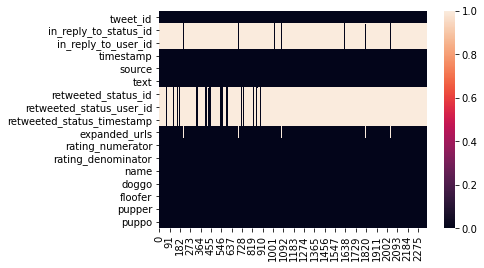

In [11]:
sns.heatmap(twitter_archive_enhanced_.isnull().T);

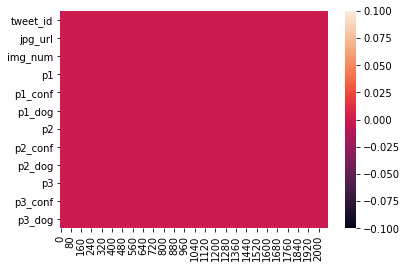

In [28]:
sns.heatmap(tweet_image_predictions_.isnull().T);

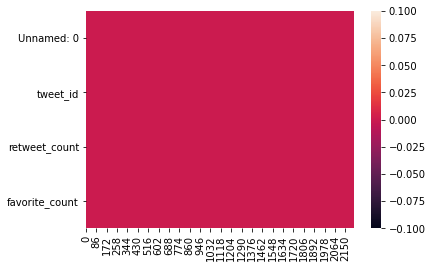

In [29]:
sns.heatmap(tweet_attrs_.isnull().T);

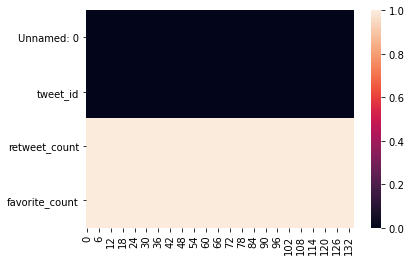

In [30]:
sns.heatmap(deleted_tweets_.isnull().T);

#### Validity : Checking for datatypes

In [16]:
pd.DataFrame(twitter_archive_enhanced_.dtypes, columns = ['Datatype']).T

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
Datatype,int64,float64,float64,object,object,object,float64,float64,object,object,int64,int64,object,object,object,object,object


In [17]:
pd.DataFrame(tweet_attrs_.dtypes, columns = ['Datatype']).T

,Unnamed: 0,tweet_id,retweet_count,favorite_count
Datatype,int64,int64,int64,int64


In [20]:
pd.DataFrame(deleted_tweets_.dtypes, columns = ['Datatype']).T

,Unnamed: 0,tweet_id,retweet_count,favorite_count
Datatype,int64,int64,float64,float64


In [19]:
pd.DataFrame(image_predictions_.dtypes, columns = ['Datatype']).T

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
Datatype,int64,object,int64,object,float64,bool,object,float64,bool,object,float64,bool


### Documenting Issues

#### Quality issues

**Completness**

1. Columns: in_reply_to_status_id, in_reply_to_user_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in `twitter_archive_enhanced` are either completely empty or have very few values.

**Validity**

2. In `twitter_archive_enhanced`, the timestamp column is represented as an object.
3. In `tweet_attrs` and deleted_tweets have an added index stored as a column.
4. In `twitter_archive_enhanced`, the columns representing dog stages should be of boolean type.

**Accuracy**

5. In `twitter_archive_enhanced`, articles have crept in the dog names section. 
6. In `twitter_archive_enhanced`, an incorrect rating is assigned to the numerator and the denominator columns of the tweet with id: 775096608509886464. The rating on tweet text is 14/10 but the rating stored in 9/11.
7. In `twitter_archive_enhanced`, the rating in tweet with id: 684959798585110529 is for a goat and not a dog.
8. In `tweet_attrs`, some tweets have a favorite count of 0.


#### Tidiness Issues

1. In `twitter_archive_enhanced` - the dog stage can be represented as a single categorical column. 
2. In `twitter_archive_enhanced` - the dog attributes(stage & ratings) form a separate observational unit.
3. The `tweet_attrs` and `deleted_tweets` both represent a single observational unit : tweet attributes.

#### Tidiness issues

## Cleaning

### Quality issues

**Completness**

`1.`

*Define*  

Drop the discussed columns from the table

*Code*

In [197]:
twitter_archive_enhanced_.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id', 
                                'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                                axis = 1,inplace = True)

*Test*  

The discussed columns should not exist in twitter_archive_enhanced_

In [198]:
twitter_archive_enhanced_.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Validity**

`2.`

*Define*

Convert the timestamp column to datetime using pandas' to_datetime function

*Code*

In [199]:
twitter_archive_enhanced_['timestamp'] = pd.to_datetime(twitter_archive_enhanced_.timestamp)

*Test*

The dtype of the timestamp column should be pandas' datetime64 type

In [200]:
twitter_archive_enhanced_.timestamp.dtype

datetime64[ns, UTC]

`3.` 

*Define*  

Drop the extra index columns from the tables

*Code*

In [201]:
tweet_attrs_.drop('Unnamed: 0', axis = 1,inplace = True)
deleted_tweets_.drop('Unnamed: 0', axis = 1,inplace = True)

*Test*  

The extra index columns should not exist in tweet_attrs_ & deleted_tweets_

In [202]:
tweet_attrs_.head(0)

,tweet_id,retweet_count,favorite_count


In [203]:
deleted_tweets_.head(0)

,tweet_id,retweet_count,favorite_count


`4.` 

*Define*

Convert the values in the columns referring to the dog stages to True and False. Follow it up by converting the datatypes to bool using pandas' astype() functionality.

*Code*

In [204]:
def stage_map(x):
    
    if x == 'None':
        return False
    else:
        return True 
    
stages = ['doggo','floofer','puppo','pupper']

twitter_archive_enhanced_[stages] = twitter_archive_enhanced_[stages].applymap(stage_map)
twitter_archive_enhanced_[stages] = twitter_archive_enhanced_[stages].astype('bool')

*Test*`

The dtypes for dog stages in twitter_archive_enahnced data should be bool.

In [205]:
twitter_archive_enhanced_[stages].dtypes

doggo      bool
floofer    bool
puppo      bool
pupper     bool
dtype: object

**Accuracy**

`5.` 

*Define*

In tweets where an article is present in the name section, replace the article by 'None' in the name column of such tweets.

*Code*

In [206]:
err_idx = twitter_archive_enhanced_.query('name == "a" or name == "an" or name == "the"').index

for idx in err_idx:
    
    twitter_archive_enhanced_.loc[idx,'name'] = 'None'

*Test*

We should get an empty dataframe upon quering for rows with names 'a','an', or 'the'

In [207]:
twitter_archive_enhanced_.query('name == "a" or name == "an" or name == "the"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`6.` 

*Define*

Manually replacing the values using the loc functionality.

*Code*

In [208]:
idx = twitter_archive_enhanced_.query('tweet_id == 775096608509886464').index

twitter_archive_enhanced_.loc[idx[0],'rating_numerator'] = 14
twitter_archive_enhanced_.loc[idx[0],'rating_denominator'] = 11 

*Test*

The rating_numerator and rating_denominator columns for tweet_id 775096608509886464 should display 14 and 10 respectively.

In [209]:
print('Rating numerator for tweet_id 775096608509886464:  ', twitter_archive_enhanced_.loc[784,'rating_numerator'])
print('Rating denominator for tweet_id 775096608509886464:', twitter_archive_enhanced_.loc[784,'rating_denominator'])

Rating numerator for tweet_id 775096608509886464:   14
Rating denominator for tweet_id 775096608509886464: 11


`7.`

*Define*

Convert the rating to np.nan

*Code*

In [210]:

idx = twitter_archive_enhanced_.query('tweet_id == 684959798585110529').index

twitter_archive_enhanced_.loc[idx[0],'rating_numerator'] = np.nan
twitter_archive_enhanced_.loc[idx[0],'rating_denominator'] = np.nan

*Test* 

The rating_numerator and rating_denominator columns for tweet_id 684959798585110529 should display nan

In [211]:
print('Rating numerator for tweet_id 775096608509886464:  ', twitter_archive_enhanced_.loc[idx[0],'rating_numerator'])
print('Rating denominator for tweet_id 775096608509886464:', twitter_archive_enhanced_.loc[idx[0],'rating_denominator'])

Rating numerator for tweet_id 775096608509886464:   nan
Rating denominator for tweet_id 775096608509886464: nan


`8.` 

*Define* 

Convert the 0's in favorite count to numpy's nan

*Code*

In [212]:
def convert_to_null(x):
    
    if x == 0:
        return np.nan
    else:
        return x
    
tweet_attrs_['favorite_count'] = tweet_attrs_.favorite_count.apply(convert_to_null)    

*Test*

A query for favorite_count equalling 0 in tweet_attrs dataframe should yield an empty dataframe.

In [213]:
tweet_attrs_.query('favorite_count == 0')

,tweet_id,retweet_count,favorite_count


### Tidiness issues 

`1.`

*Define*

1. Use pandas' melt function on the subset of columns representing dog stages.
2. Use the resulting dataframe to extract the value of dog stages.  
3. Store the values as one master dataframe or series
4. Join the series to twitter_archive_enhanced

*Code*

In [214]:
dog_stages = twitter_archive_enhanced_[['tweet_id','doggo','floofer','pupper','puppo']]
dog_stages.set_index('tweet_id', inplace = True)
dog_stages.value_counts()

doggo_pupper_idx = dog_stages.query(" doggo == True and pupper == True").index.tolist()  # Dropping indices that
                                                                                         # categorize a dog into                                                                                            
doggo_floofer_idx = dog_stages.query("doggo == True and floofer == True").index.tolist() # more than one stage.

dog_stages.drop(doggo_pupper_idx, inplace = True)
dog_stages.drop(doggo_floofer_idx, inplace = True)

dog_stage_melt =  dog_stages.melt(ignore_index = False)                  # Get variable value pair stored in a dataframe.

doggo = pd.DataFrame(dog_stage_melt.query(" value == True and variable == 'doggo'"))

floofer = pd.DataFrame(dog_stage_melt.query(" value == True and variable == 'floofer'"))

pupper = pd.DataFrame(dog_stage_melt.query(" value == True and variable == 'pupper'"))

puppo = pd.DataFrame(dog_stage_melt.query(" value == True and variable == 'puppo'"))

dog_stage = pd.concat([doggo,floofer,pupper,puppo])

twitter_archive_enhanced_ = twitter_archive_enhanced_.join(dog_stage, on = 'tweet_id', how = 'left') 

twitter_archive_enhanced_.rename(columns = { 'variable' : 'dog_stage'}, inplace = True)
twitter_archive_enhanced_.drop(['doggo','floofer','pupper','puppo','value'], axis = 1, inplace = True)

C:\Users\Nishant\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


*Test*

`twitter_archive_enhanced_` should have a only single column to represent dog stages.

In [215]:
twitter_archive_enhanced_.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


`2.`

*Define*

Create a new table called dog_attrs with columns:`tweet_id`,`text`, `name`,`dog_stage` ,`rating_numerator`, `rating_denominator` 


*Code*

In [216]:
dog_attrs = twitter_archive_enhanced_[['tweet_id','text','name','dog_stage','rating_numerator','rating_denominator']]

*Test*

We will have a new table dog_attrs containing the columns described earlier. 

In [217]:
dog_attrs.head()

,tweet_id,text,name,dog_stage,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,10.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0,10.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12.0,10.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,13.0,10.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,12.0,10.0


`3.`

*Define*

Join the tweet_attrs & deleted_tweets table

*Code*

In [218]:
tweet_attrs_ = pd.concat([tweet_attrs_, deleted_tweets_])

*Test* 

tweet_attrs will have a total of 2356 rows

In [219]:
len(tweet_attrs_.index)

2356

## Storing

### Creating master dataset

In [220]:
twitter_archive_master = twitter_archive_enhanced_.join(tweet_image_predictions_.set_index('tweet_id'), on = 'tweet_id',
                                                        how = 'left')

twitter_archive_master = twitter_archive_master.join(tweet_attrs_.set_index('tweet_id'), on = 'tweet_id', how = 'left')

### Storing dataset files to csv

In [166]:

"""
                     The sript below stores all the cleaned datasets in a directory called 
                     dataset_files. And inside it: a sub-directory called submission_files,
                     which contains the master dataframe called twitter_archive_master 
                     along with other dataframes that were created for the purpose of
                     tidiness.

"""

target_folder =  'cleaned_dataset_files/submission_files'


if not os.path.exists(target_folder):
    
    os.makedirs(target_folder)
    

# Adding files to dataset_files

tweet_image_predictions_.to_csv('cleaned_dataset_files/image_predictions.csv')

# Addding files to submission_files

twitter_archive_master.to_csv('cleaned_dataset_files/submission_files/twitter_archive_master.csv')
tweet_attrs_.to_csv('cleaned_dataset_files/submission_files/tweet_attrs.csv')
dog_attrs.to_csv('cleaned_dataset_files/submission_files/dog_attrs.csv')
twitter_archive_enhanced_.to_csv('cleaned_dataset_files/submission_files/twitter_archive_enhanced.csv')


### Storing dataset files to SQlite database

In [167]:
"""   
                  The script stores all the submission files in a SQlite database.
             
"""

from sqlalchemy import create_engine

engine = create_engine('sqlite:///Submissions.db')


twitter_archive_master.to_sql('twitter_archive_master', engine)
                                 
twitter_archive_enhanced_.to_sql('twitter_archive_enhanced', engine)                                 
tweet_attrs_.to_sql('tweet_attrs',  engine)
dog_attrs.to_sql('dog_attrs', engine)

## Analysis and visualization

**Create engine for data extraction**

In [168]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///Submissions.db')

### Most tweeted dog stage

In [169]:
query_string = """ 
                    SELECT 
                           tweet_id,
                           dog_stage
                    FROM 
                           dog_attrs
      
               """

dog_stage_info = pd.read_sql(query_string, engine)

In [177]:
pd.DataFrame(dog_stage_info.dog_stage.value_counts()).T

,pupper,doggo,puppo,floofer
dog_stage,245,84,30,9


### Average popularity rating of WeRateDogs

In [ ]:
query_string = """ 
                    SELECT 
                           tweet_id,
                           retweet_count,
                           favorite_count
                    FROM 
                           tweet_attrs
      
               """

tweet_popularity_metrics = pd.read_sql(query_string, engine)

In [182]:
avg_popularity_metrics = pd.DataFrame(tweet_popularity_metrics[['retweet_count','favorite_count']].mean(),\
                                      columns = ['Mean'])

avg_popularity_metrics.unstack().unstack()

,retweet_count,favorite_count
Mean,2426.205313,7474.802404


### Popularity trend of WeRateDogs

In [191]:
sql_query = """ SELECT 
                        tweet_id, 
                        retweet_count, 
                        favorite_count, 
                        timestamp 
                FROM  
                        twitter_archive_master 
            """

tweet_popularity = pd.read_sql(sql_query, engine)

In [192]:
import calendar

quarter_abbrs = {1 : 'Q1',
                 2 : 'Q2',
                 3 : 'Q3',
                 4 : 'Q4'
                 }

tweet_popularity['timestamp'] = pd.to_datetime(tweet_popularity.timestamp)
tweet_popularity['year'] =     tweet_popularity.timestamp.dt.year
tweet_popularity['month'] =    tweet_popularity.timestamp.dt.month
tweet_popularity['month'] =    tweet_popularity.month.apply(lambda x: calendar.month_abbr[x])
tweet_popularity['quarter'] =  tweet_popularity.timestamp.dt.quarter
tweet_popularity['year_quarter']  = tweet_popularity.year.astype('str')+ ' ' + tweet_popularity.quarter.map(quarter_abbrs)

popularity_trend = tweet_popularity[['retweet_count','favorite_count','year_quarter','quarter']].groupby(['year_quarter']).sum()

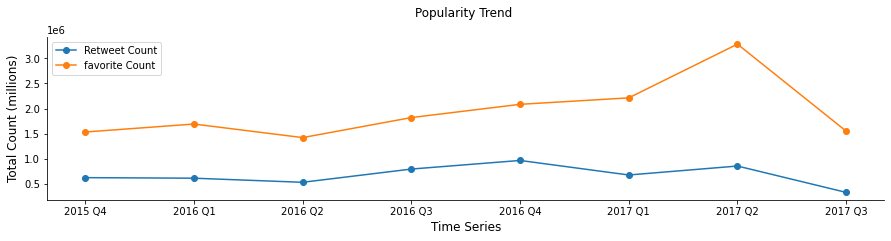

In [193]:
font = {
             'family': 'helvetica',
             'color':  'black',
             'weight': 'light',
             'size': 12,
              }


plt.figure(figsize = (15,3))

plt.plot(popularity_trend.index, popularity_trend.retweet_count, label = 'Retweet Count', marker = 'o')
plt.plot(popularity_trend.index, popularity_trend.favorite_count, label = 'favorite Count', marker = 'o')

plt.xlabel('Time Series', fontdict = font)
plt.ylabel('Total Count (millions)', fontdict = font, loc = 'center')

plt.title('Popularity Trend ', fontdict = font, pad = 20)
plt.legend(loc = 'best')



sns.despine()

plt.show()